In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

import matplotlib.pyplot as plt

In [63]:
def boris_pusher(x, v, E, B, q, m, dt, first_step=False):
    """
    Boris pusher for charged particle motion in electromagnetic fields.
    
    Parameters:
    -----------
    x : array_like
        Position vector [x, y, z]
    v : array_like
        Velocity vector [vx, vy, vz]
    E : array_like
        Electric field vector [Ex, Ey, Ez]
    B : array_like
        Magnetic field vector [Bx, By, Bz]
    q : float
        Particle charge
    m : float
        Particle mass
    dt : float
        Time step
    first_step : bool, optional
        If True, performs initial half-step velocity push
    
    Returns:
    --------
    x_new : array_like
        Updated position
    v_new : array_like
        Updated velocity
    """
    # Convert to numpy arrays
    # x = np.array(x)
    # v = np.array(v)
    # E = np.array(E)
    # B = np.array(B)
    
    # If first step, push velocity by half step using simple method
    if first_step:
        # Simple half-step push for initialization
        a = (q / m) * (E + np.cross(v, B))
        v = v + a * (dt / 2)
    
    # Half acceleration due to electric field
    v_minus = v + (q * E / m) * (dt / 2)
    
    # Rotation due to magnetic field
    t = (q * B / m) * (dt / 2)
    s = 2 * t / (1 + np.dot(t, t))
    
    v_prime = v_minus + np.cross(v_minus, t)
    v_plus = v_minus + np.cross(v_prime, s)
    
    # Half acceleration due to electric field
    v_new = v_plus + (q * E / m) * (dt / 2)
    
    # Update position
    x_new = x + v_new * dt
    
    return x_new, v_new

In [4]:
def rk4_step(x, v, E, B, q, m, dt):
    """
    Runge-Kutta 4th order integrator for charged particle motion.
    
    Parameters:
    -----------
    x : array_like
        Position vector [x, y, z]
    v : array_like
        Velocity vector [vx, vy, vz]
    E : array_like
        Electric field vector [Ex, Ey, Ez]
    B : array_like
        Magnetic field vector [Bx, By, Bz]
    q : float
        Particle charge
    m : float
        Particle mass
    dt : float
        Time step
    
    Returns:
    --------
    x_new : array_like
        Updated position
    v_new : array_like
        Updated velocity
    """
    def lorentz_force(x, v, E, B, q, m):
        """Compute acceleration from Lorentz force"""
        return (q / m) * (E + np.cross(v, B))
    
    # k1
    k1_v = lorentz_force(x, v, E, B, q, m)
    k1_x = v
    
    # k2
    v2 = v + 0.5 * dt * k1_v
    x2 = x + 0.5 * dt * k1_x
    k2_v = lorentz_force(x2, v2, E, B, q, m)
    k2_x = v2
    
    # k3
    v3 = v + 0.5 * dt * k2_v
    x3 = x + 0.5 * dt * k2_x
    k3_v = lorentz_force(x3, v3, E, B, q, m)
    k3_x = v3
    
    # k4
    v4 = v + dt * k3_v
    x4 = x + dt * k3_x
    k4_v = lorentz_force(x4, v4, E, B, q, m)
    k4_x = v4
    
    # Update
    v_new = v + (dt / 6) * (k1_v + 2*k2_v + 2*k3_v + k4_v)
    x_new = x + (dt / 6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
    
    return x_new, v_new


In [67]:
x0 = np.array([0, 1, 0])
v0 = np.array([1, 0, 0])
E = np.array([0, 0, 0])
B = np.array([0, 0, 5])
q = 1
m = 1
dt = 0.1

N = 1000

xs_boris = np.zeros((N, 3))
xs_rk4 = np.zeros((N, 3))
vs_boris = np.zeros((N, 3))
vs_rk4 = np.zeros((N, 3))

x_boris = x0
# v_boris = v0 - (q / m) * (E + np.cross(v0, B)) * (dt / 2)
v_boris = v0
x_rk4 = x0
v_rk4 = v0
for i in range(N):
    x_boris, v_boris = boris_pusher(x_boris, v_boris, E, B, q, m, dt)
    x_rk4, v_rk4 = rk4_step(x_rk4, v_rk4, E, B, q, m, dt)
    xs_boris[i] = x_boris
    vs_boris[i] = v_boris
    xs_rk4[i] = x_rk4
    vs_rk4[i] = v_rk4

Text(0, 0.5, '$y$')

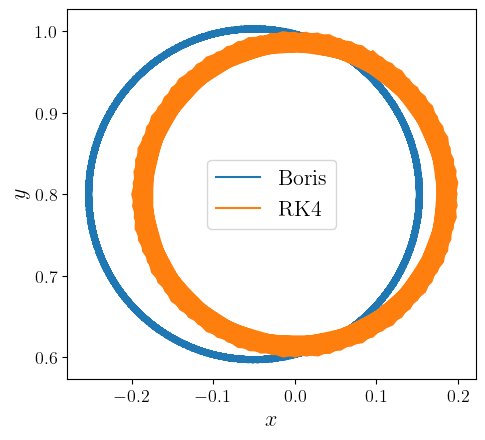

In [68]:
plt.plot(xs_boris[:,0], xs_boris[:,1], label='Boris')
plt.plot(xs_rk4[:,0], xs_rk4[:,1], label='RK4')
plt.legend(fontsize=16)
# plt.show()
ax = plt.gca()
ax.set_aspect('equal')
ax.tick_params(labelsize=13)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
# ax.set_ylim(-1.1, -0.9)
# ax.set_xlim(-1.1, -0.9)
# plt.show()


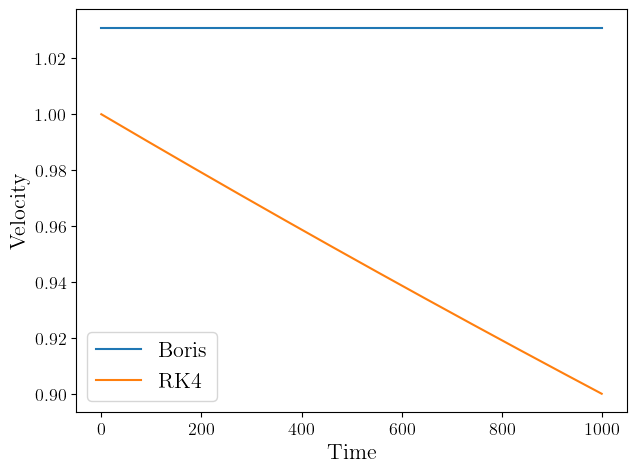

In [66]:
plt.plot(np.sqrt(vs_boris[:,0]**2 + vs_boris[:,1]**2), label='Boris')
plt.plot(np.sqrt(vs_rk4[:,0]**2 + vs_rk4[:,1]**2), label='RK4')
plt.legend(fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Velocity', fontsize=16)
# plt.title('Velocity of Charged Particle in Magnetic Field', fontsize=16)
plt.tight_layout()
ax = plt.gca()
ax.tick_params(labelsize=13)
# plt.show()